<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
## Write your code here
print("Column Names and Data Types:\n")
print(df.dtypes)

print("\nDataset Info:\n")
df.info()

print("\nSummary Statistics:\n")
print(df.describe())

Column Names and Data Types:

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

Summary Statistics:

         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04     

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [6]:
## Write your code here
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

df['JobSat'] = df['JobSat'].fillna(df['JobSat'].median())

# Fill numeric columns with median
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.median()))

# Fill text (object) columns with 'Unknown'
text_cols = df.select_dtypes(include='object').columns
df[text_cols] = df[text_cols].fillna('Unknown')

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [7]:
## Write your code here

# Employment distribution
print("Employment Distribution:\n")
print(df['Employment'].value_counts(dropna=False))
print("\n" + "-"*50)

# Job Satisfaction distribution
print("JobSat Distribution:\n")
print(df['JobSat'].value_counts(dropna=False))
print("\n" + "-"*50)

# Years of Professional Coding Experience distribution
print("YearsCodePro Distribution:\n")
print(df['YearsCodePro'].value_counts(dropna=False).sort_index())

Employment Distribution:

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking f

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


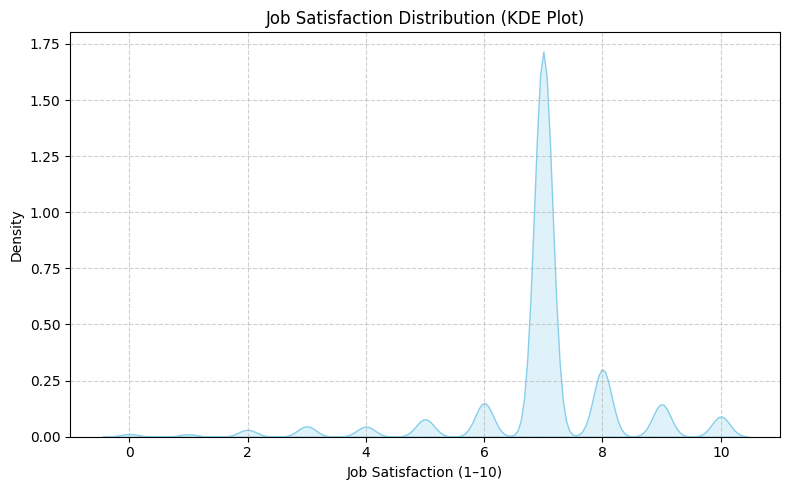

In [11]:
## Write your code here

# KDE plot
plt.figure(figsize=(8, 5))
sns.kdeplot(job_sat_clean, fill=True, color='skyblue')
plt.title('Job Satisfaction Distribution (KDE Plot)')
plt.xlabel('Job Satisfaction (1–10)')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


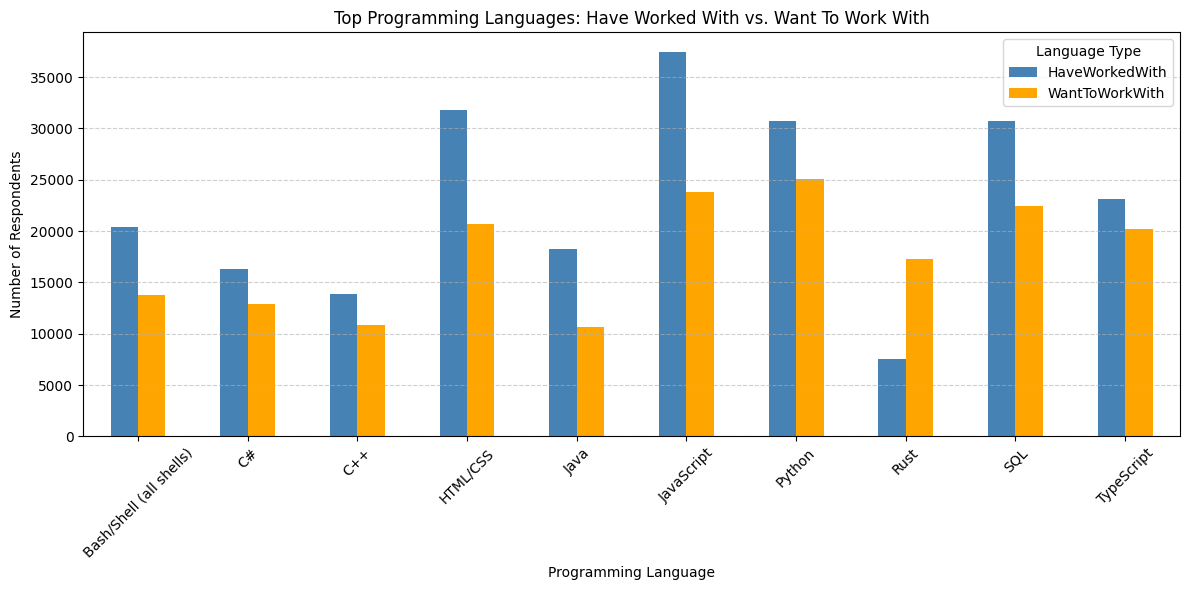

In [13]:
## Write your code here

# Drop rows with missing values in either column
df_langs = df.dropna(subset=['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'])

# Flatten the semicolon-separated strings into individual rows
have_langs = df_langs['LanguageHaveWorkedWith'].str.split(';').explode().str.strip()
want_langs = df_langs['LanguageWantToWorkWith'].str.split(';').explode().str.strip()

# Get value counts
have_counts = have_langs.value_counts()
want_counts = want_langs.value_counts()

# Combine into a single DataFrame
lang_df = pd.DataFrame({
'HaveWorkedWith': have_counts,
'WantToWorkWith': want_counts
}).fillna(0)

# Optional: Focus on top N most common languages across both sets
top_langs = lang_df.sum(axis=1).sort_values(ascending=False).head(10).index
lang_df_top = lang_df.loc[top_langs]

# Plot grouped bar chart
lang_df_top.sort_index(inplace=True) # Sort alphabetically for cleaner display
lang_df_top.plot(kind='bar', figsize=(12, 6), color=['steelblue', 'orange'])

plt.title('Top Programming Languages: Have Worked With vs. Want To Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Language Type')
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


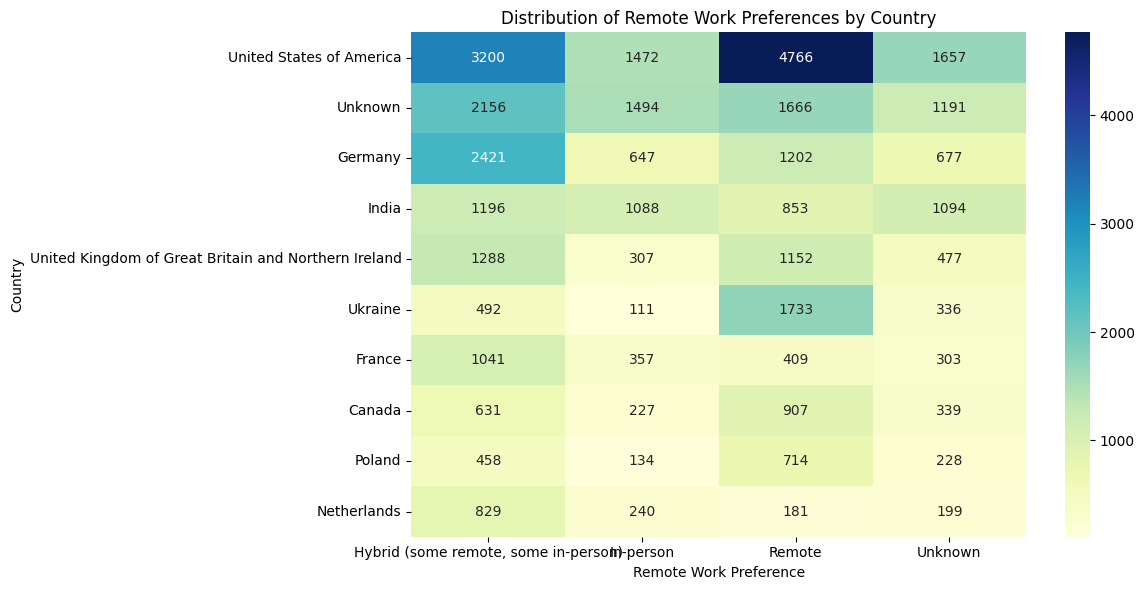

In [14]:
## Write your code here

# Drop missing values for required columns
df_rm = df.dropna(subset=['RemoteWork', 'Country'])

# Create a cross-tab of RemoteWork by Country
remote_region_ct = pd.crosstab(df_rm['Country'], df_rm['RemoteWork'])

# Optional: Filter for top countries to keep heatmap readable
top_countries = df_rm['Country'].value_counts().head(10).index
remote_region_ct = remote_region_ct.loc[top_countries]

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(remote_region_ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribution of Remote Work Preferences by Country')
plt.xlabel('Remote Work Preference')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [15]:
## Write your code here

# Sample data (replace with your actual data)
data = {
'JobSat': [7, 8, 6, 9, 5, 4, 6, 7, 10, 8], # Example job satisfaction data
'YearsCodePro': [2, 5, 15, 8, 3, 25, 12, 1, 30, 18] # Example years of professional coding experience data
}

# Create DataFrame
df = pd.DataFrame(data)

# Define bins and labels for YearsCodePro
bins = [0, 5, 10, 20, float('inf')] # Define the boundaries
labels = ['0-5', '6-10', '11-20', '20+'] # Labels for the bins

# Create a new column with grouped YearsCodePro
df['YearsCodePro_Grouped'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)

# Now, calculate the mean JobSat for each group of YearsCodePro
grouped_job_sat = df.groupby('YearsCodePro_Grouped')['JobSat'].mean()

print("Mean JobSat for each YearsCodePro group:")
print(grouped_job_sat)

# Calculate the correlation between the grouped YearsCodePro and JobSat
# Since YearsCodePro is now categorical, we need to convert it to numeric values for correlation
df['YearsCodePro_Grouped_Numeric'] = df['YearsCodePro_Grouped'].cat.codes

# Calculate the Pearson correlation coefficient
correlation = df['JobSat'].corr(df['YearsCodePro_Grouped_Numeric'])

print(f"The Pearson correlation coefficient between JobSat and grouped YearsCodePro is: {correlation}")

Mean JobSat for each YearsCodePro group:
YearsCodePro_Grouped
0-5      6.750000
6-10     9.000000
11-20    6.666667
20+      7.000000
Name: JobSat, dtype: float64
The Pearson correlation coefficient between JobSat and grouped YearsCodePro is: 0.0


/tmp/ipykernel_6672/1938978021.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_job_sat = df.groupby('YearsCodePro_Grouped')['JobSat'].mean()


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


Cross-tabulation between EdLevel and Employment:
Employment         Employed full-time  Employed part-time  Student  Unemployed
EdLevel                                                                       
Associate degree                    0                   0        1           0
Bachelor’s degree                   1                   0        1           2
Master’s degree                     1                   1        0           0
Some college                        1                   1        0           0


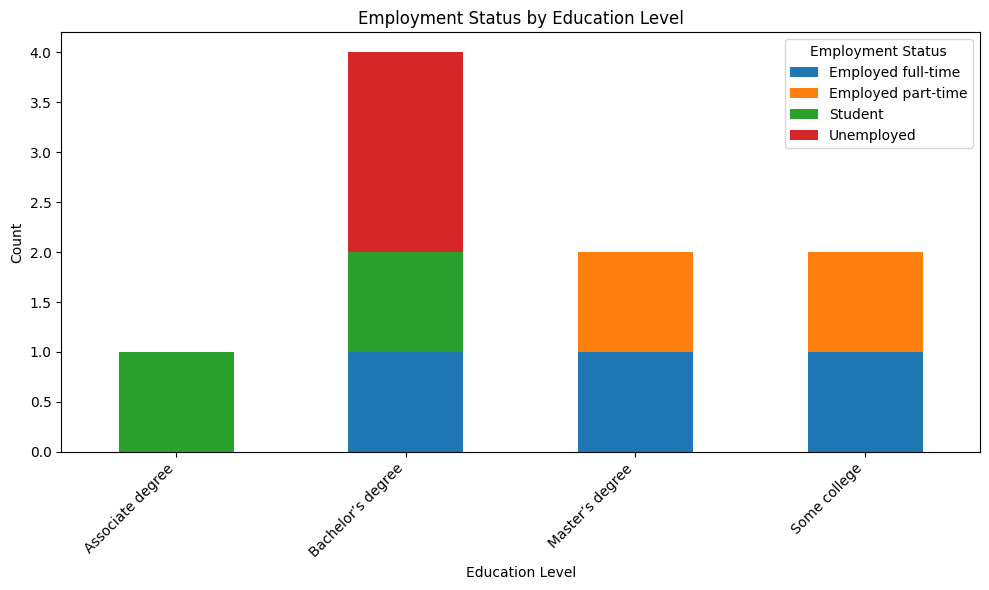

In [16]:
## Write your code here

# Example dataset (replace with your real data)
data = {
'Employment': ['Employed full-time', 'Employed part-time', 'Unemployed', 'Employed full-time',
'Student', 'Unemployed', 'Employed full-time', 'Student', 'Employed part-time'],
'EdLevel': ['Bachelor’s degree', 'Master’s degree', 'Bachelor’s degree', 'Some college',
'Associate degree', 'Bachelor’s degree', 'Master’s degree', 'Bachelor’s degree', 'Some college']
}

# Create DataFrame
df = pd.DataFrame(data)

# Create cross tabulation
cross_tab = pd.crosstab(df['EdLevel'], df['Employment'])

print("Cross-tabulation between EdLevel and Employment:")
print(cross_tab)

# Plot the cross-tab as a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Employment Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Status')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [18]:
## Write your code here

df.to_csv('cleaned_jobsat.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
